In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import semfunction as sf
import scipy.stats as stats
import plotly.express as px

import os

C:\Users\semde\AppData\Local\Temp\ipykernel_14000\2649718369.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Info dataframe

In [3]:
url = r"..\data\cleaned\clean_house.csv"
house = pd.read_csv(url, sep=",")
url = r"..\data\cleaned\clean_app.csv"
app = pd.read_csv(url, sep=",")

In [4]:
house.head(5)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,ronse,oost-vlaanderen
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,merelbeke,oost-vlaanderen
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,trooz,luik
3,11153591,ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,1.0,37.0,1.0,76.0,165.0,2.0,NaN,GOOD,ottignies-louvain-la-neuve,waals-brabant
4,11128275,antwerpen merksem,2170,51.243743,4.443372,HOUSE,MIXED_USE_BUILDING,399900.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,65.0,2.0,0.0,GOOD,antwerpen,antwerpen


In [5]:
house["open_fire"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11394 entries, 0 to 11393
Series name: open_fire
Non-Null Count  Dtype
--------------  -----
11394 non-null  int64
dtypes: int64(1)
memory usage: 89.1 KB


In [6]:
house.groupby("state_of_building")["state_of_building"].count()

state_of_building
AS_NEW            1563
GOOD              4154
JUST_RENOVATED     462
TO_BE_DONE_UP     1107
TO_RENOVATE       1684
TO_RESTORE          86
Name: state_of_building, dtype: int64

In [7]:
app.head(5)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11141961,sint-joost-ten-node,1210,NaN,NaN,APARTMENT,FLAT_STUDIO,120000.0,BUY_REGULAR,NaN,...,1.0,6.0,NaN,NaN,NaN,NaN,NaN,TO_BE_DONE_UP,sint-joost-ten-node,brussel
1,11158977,elsene,1050,50.832733,4.364130,APARTMENT,APARTMENT,325000.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,elsene,brussel
2,11072105,brussel,1040,50.843509,4.370263,APARTMENT,APARTMENT,650000.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,0.0,AS_NEW,etterbeek,brussel
3,11129303,de haan,8420,51.257157,2.999425,APARTMENT,APARTMENT,119000.0,BUY_REGULAR,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,de haan,west-vlaanderen
4,11155131,vorselaar,2290,51.202692,4.768350,APARTMENT,APARTMENT,249000.0,BUY_REGULAR,NaN,...,1.0,NaN,NaN,NaN,NaN,3.0,NaN,GOOD,vorselaar,antwerpen


In [8]:
app.groupby("state_of_building")["state_of_building"].count()

state_of_building
AS_NEW            2581
GOOD              3229
JUST_RENOVATED     504
TO_BE_DONE_UP      495
TO_RENOVATE        295
TO_RESTORE          22
Name: state_of_building, dtype: int64

The Question: What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?

Anwser: The price exhibits a significant correlation with the living area and terrace area. This correlations can be attributed to the logical influence of price on the living space of a house. The price has no correlation with number of facades, surface of goods and number of rooms. The reason price and living area are better correlated is because if the house is bigger the price goes up. It also importend to note in which state the house is.


The Question: How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?

Anwser: There exist correlations beyond just price, notably in the linear relationships between living area and terrace space and garden area and the overall land size(surface area). As the living area within a house expands, so does the corresponding terrace area. The garden area also expands.

## Houses

989


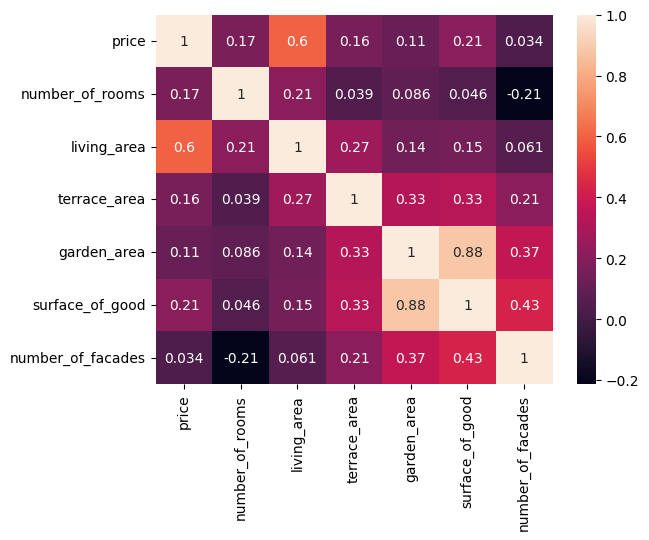

In [9]:

ndf = sf.filter_cities(house, "gent", "brussel", "brugge", "leuven", "antwerpen", "mechelen", "luik", "hasselt", "kortrijk", "doornik", "charleroi", "namen", "ieper", "roeselare")
fdf = ndf[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "surface_of_good", "number_of_facades"]]
print(fdf.shape[0])
sf.heatmap(fdf)

In [10]:
fdf.head(10)
fdf = fdf[fdf["living_area"] < 750]
fdf = fdf[fdf["price"] < 500000]


None


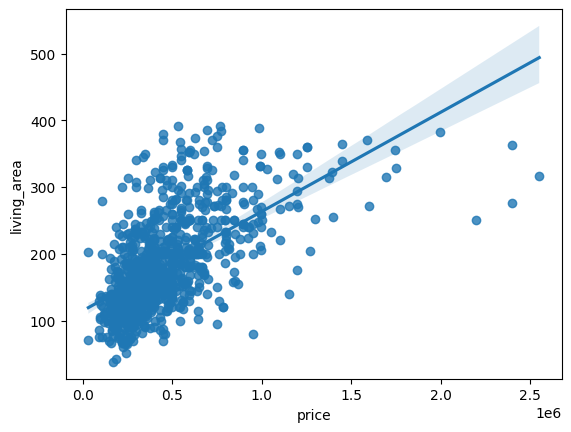

In [11]:

print(sf.regplot(ndf, "price", "living_area"))

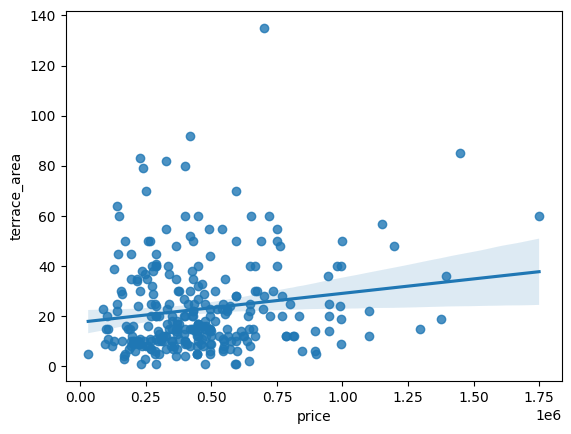

In [12]:
sf.regplot(ndf, "price", "terrace_area")

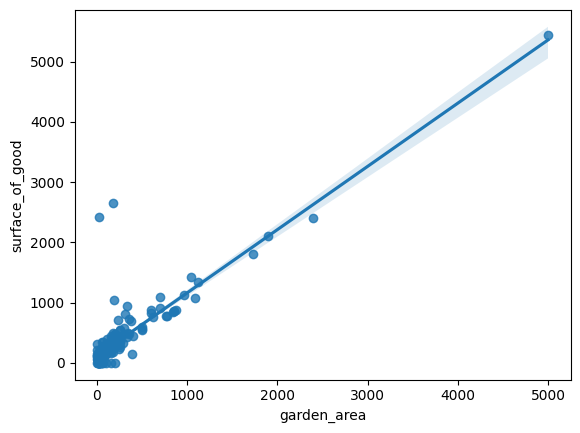

In [13]:
sf.regplot(ndf, "garden_area", "surface_of_good")

## Appartements

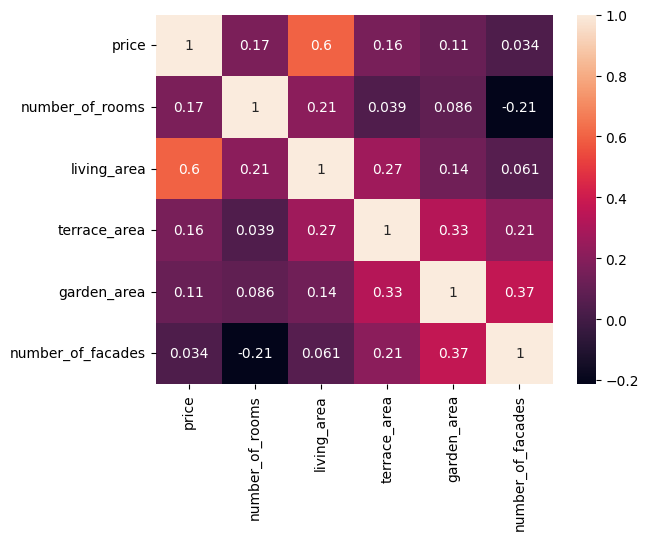

In [14]:
andf = sf.filter_cities(app, "gent", "brussel", "brugge", "leuven", "antwerpen")
afdf = ndf[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "number_of_facades"]]
sf.heatmap(afdf)

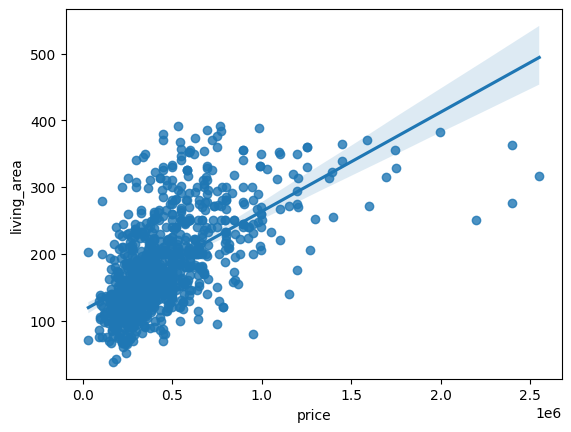

In [15]:
sf.regplot(afdf, "price", "living_area")

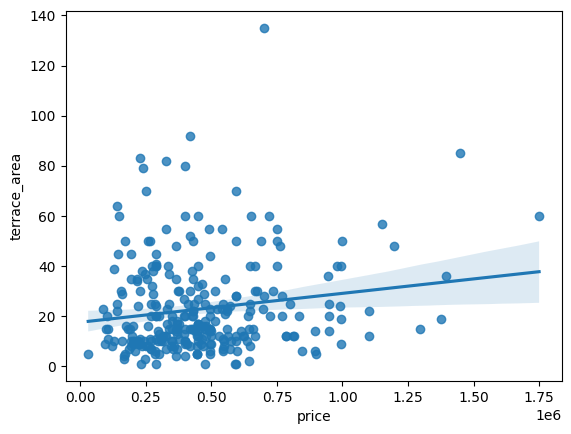

In [16]:
sf.regplot(afdf, "price", "terrace_area")

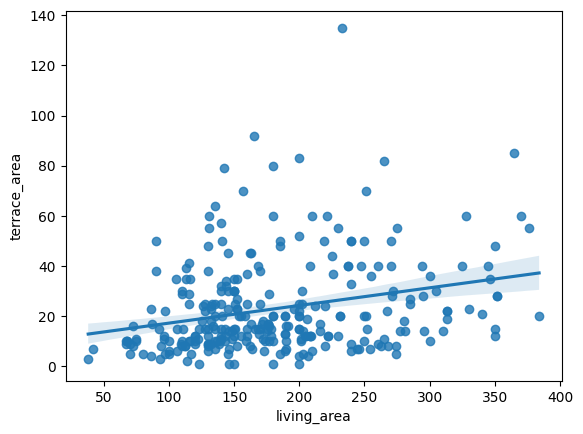

In [17]:
sf.regplot(afdf, "living_area", "terrace_area")

## State of building correlation

In [18]:
house.groupby("state_of_building")["state_of_building"].count()
state_of_building_mapping = {"AS_NEW":6, "GOOD":5, "JUST_RENOVATED":4, "TO_BE_DONE_UP":3, "TO_RENOVATE":2, "TO_RESTORE":1}
state_house = house
state_house["values_state_building"] =  state_house["state_of_building"].replace(state_of_building_mapping)
state_house.head(5)

C:\Users\semde\AppData\Local\Temp\ipykernel_14000\3684524679.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  state_house["values_state_building"] =  state_house["state_of_building"].replace(state_of_building_mapping)


,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province,values_state_building
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,ronse,oost-vlaanderen,5.0
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,merelbeke,oost-vlaanderen,5.0
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,trooz,luik,6.0
3,11153591,ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,37.0,1.0,76.0,165.0,2.0,NaN,GOOD,ottignies-louvain-la-neuve,waals-brabant,5.0
4,11128275,antwerpen merksem,2170,51.243743,4.443372,HOUSE,MIXED_USE_BUILDING,399900.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,65.0,2.0,0.0,GOOD,antwerpen,antwerpen,5.0


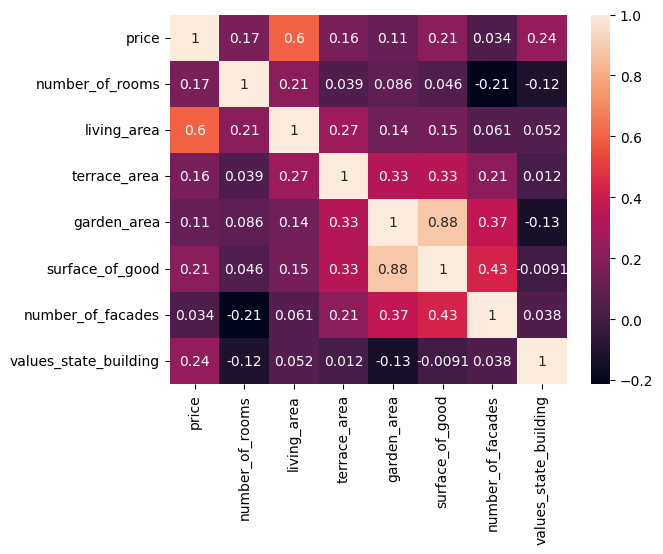

In [19]:
state = sf.filter_cities(state_house, "gent", "brussel", "brugge", "leuven", "antwerpen", "mechelen", "luik", "hasselt", "kortrijk", "doornik", "charleroi", "namen", "ieper", "roeselare")
nstate = state[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "surface_of_good", "number_of_facades", "values_state_building"]]
sf.heatmap(nstate)

## provincies

In [20]:
# Get the current directory (analyses folder)
current_dir = os.getcwd()

# Navigate up one directory to reach the parent directory (which contains the data folder)
parent_dir = os.path.dirname(current_dir)

# Define the file paths relative to the parent directory using os.path.join
clean_huis_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_house.csv")
clean_apartement_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_app.csv")

house1 = pd.read_csv(clean_huis_te_koop_path, sep=",")
app1 = pd.read_csv(clean_apartement_te_koop_path, sep=",")

### Houses

In [21]:
west = house1[house1["province"]=="west-vlaanderen"]
oost = house1[house1["province"]=="oost-vlaanderen"]
limburg = house1[house1["province"]=="limburg"]
antwerpen = house1[house1["province"]=="antwerpen"]
brussel = house1[house1["province"]=="brussel"]
henegouwen = house1[house1["province"]=="henegouwen"]
luik = house1[house1["province"]=="luik"]
luxemburg = house1[house1["province"]=="luxemburg"]
namen = house1[house1["province"]=="namen"]
vlaams_brabant = house1[house1["province"]=="vlaams-brabant"]
waals_brabant = house1[house1["province"]=="waals-brabant"]

house1.groupby("province")["province"].count()

province
antwerpen          1858
brussel             595
henegouwen          886
limburg             416
luik               1081
luxemburg           425
namen               376
oost-vlaanderen    2206
vlaams-brabant     1262
waals-brabant       504
west-vlaanderen    1785
Name: province, dtype: int64

In [22]:
westcorr = sf.drop_object_columns(west)
oostcorr = sf.drop_object_columns(oost)
limburgcorr = sf.drop_object_columns(limburg)
antwerpencorr = sf.drop_object_columns(antwerpen)
brusselcorr = sf.drop_object_columns(brussel)
henegouwencorr = sf.drop_object_columns(henegouwen)
luikcorr = sf.drop_object_columns(luik)
luxemburgcorr = sf.drop_object_columns(luxemburg)
namencorr = sf.drop_object_columns(namen)
vlaams_brabantcorr = sf.drop_object_columns(vlaams_brabant)
waals_brabantcorr = sf.drop_object_columns(waals_brabant)

504


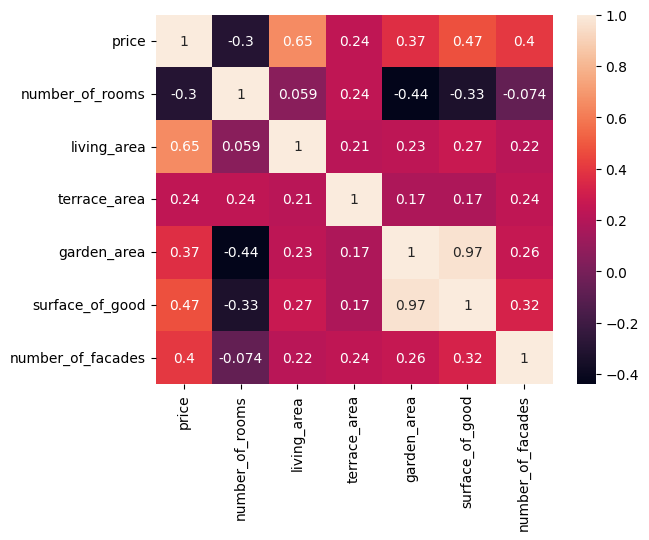

In [39]:
print(waals_brabantcorr.shape[0])
sf.heatmap(luikcorr)

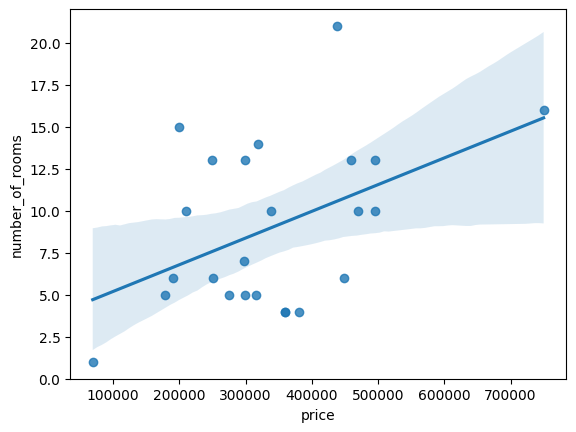

In [24]:
sf.regplot(luxemburgcorr, "price", "number_of_rooms")

### appartement

In [25]:
awest = app1[app1["province"]=="west-vlaanderen"]
aoost = app1[app1["province"]=="oost-vlaanderen"]
alimburg = app1[app1["province"]=="limburg"]
aantwerpen = app1[app1["province"]=="antwerpen"]
abrussel = app1[app1["province"]=="brussel"]
ahenegouwen = app1[app1["province"]=="henegouwen"]
aluik = app1[app1["province"]=="luik"]
aluxemburg = app1[app1["province"]=="luxemburg"]
anamen = app1[app1["province"]=="namen"]
avlaams_brabant = app1[app1["province"]=="vlaams-brabant"]
awaals_brabant = app1[app1["province"]=="waals-brabant"]

app1.groupby("province")["province"].count()

province
antwerpen          1872
brussel            2088
henegouwen          223
limburg             297
luik                381
luxemburg           136
namen               144
oost-vlaanderen    1187
vlaams-brabant      656
waals-brabant       235
west-vlaanderen    2123
Name: province, dtype: int64

In [26]:
def drop_object_columns_app(df):
    fdf = df[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "number_of_facades"]]
    return fdf


awestcorr = drop_object_columns_app(awest)
aoostcorr = drop_object_columns_app(aoost)
alimburgcorr = drop_object_columns_app(alimburg)
aantwerpencorr = drop_object_columns_app(aantwerpen)
abrusselcorr = drop_object_columns_app(abrussel)
ahenegouwencorr = drop_object_columns_app(ahenegouwen)
aluikcorr = drop_object_columns_app(aluik)
aluxemburgcorr = drop_object_columns_app(aluxemburg)
anamencorr = drop_object_columns_app(anamen)
avlaams_brabantcorr = drop_object_columns_app(avlaams_brabant)
awaals_brabantcorr = drop_object_columns_app(awaals_brabant)

235


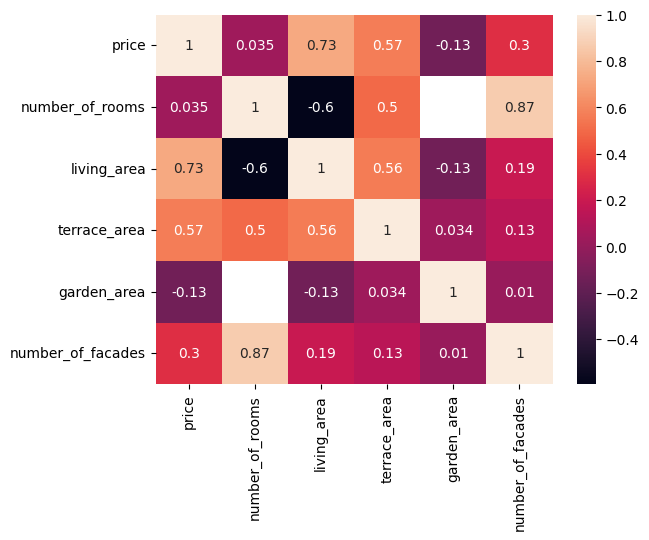

In [27]:
print(awaals_brabantcorr.shape[0])
sf.heatmap(awaals_brabantcorr)

<Axes: >

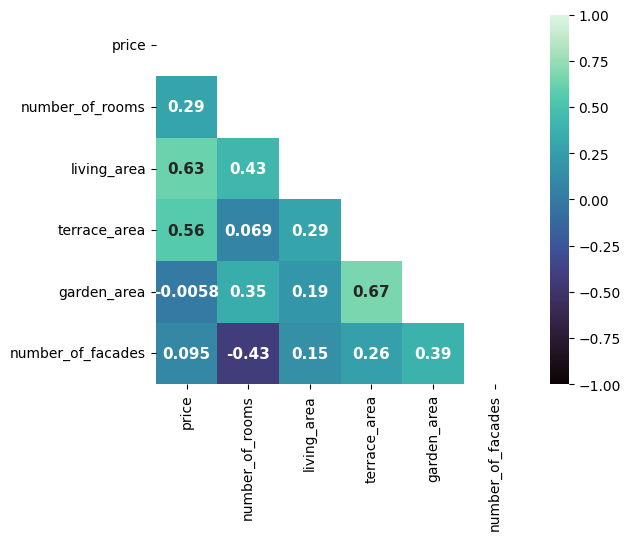

In [46]:

mask = np.triu(np.ones_like(alimburgcorr.corr()))
sns.heatmap(alimburgcorr.corr(), annot=True, vmin=-1, vmax=1, annot_kws={"fontsize":11, "fontweight":"bold"}, square=True, mask=mask, cmap='mako')


## Other visualizations

In [29]:
house1.columns

Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building', 'main_city',
       'province'],
      dtype='object')

In [30]:

fig = px.colors.qualitative.swatches()

g = sns.catplot(x="province",1
                y="price",
                data=house1,
                kind="bar",
                hue="open_fire",
                ci=None)
g.fig.suptitle("price per province")
plt.xticks(rotation=90)
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2923205941.py, line 3)

(array([ 349., 1042.,  321.,  118.,   44.,   22.,   12.,    7.,    6.,
           3.]),
 array([  32. ,  134.5,  237. ,  339.5,  442. ,  544.5,  647. ,  749.5,
         852. ,  954.5, 1057. ]),
 <BarContainer object of 10 artists>)

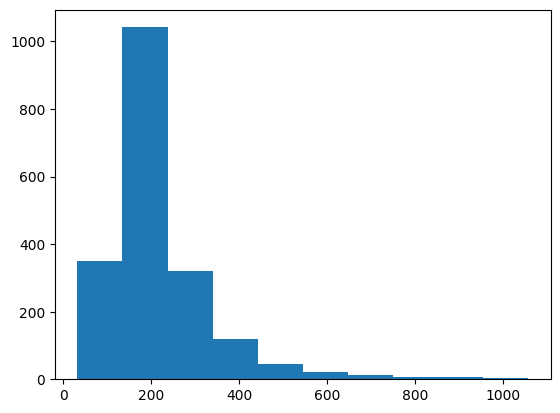

In [ ]:
mhouse = house
westv = mhouse[mhouse["province"]=="west-vlaanderen"]
plt.hist(westv.living_area)

